# Clustering and Dimension Reduction

## Preparation

**Import Dependencies**

In [106]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
)
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

**Load and prepare dataset**

In [107]:
data = pd.read_csv("datasets/SouthGermanCredit.asc", sep=" ")
print(data.head())
print(data.info())
print(
    f"{'Missing values are present. Dataset preprocessing is required.' if data.isna().any().any() else 'Missing values are not present.'}"
)

   laufkont  laufzeit  moral  verw  hoehe  sparkont  beszeit  rate  famges  \
0         1        18      4     2   1049         1        2     4       2   
1         1         9      4     0   2799         1        3     2       3   
2         2        12      2     9    841         2        4     2       2   
3         1        12      4     0   2122         1        3     3       3   
4         1        12      4     0   2171         1        3     4       3   

   buerge  ...  verm  alter  weitkred  wohn  bishkred  beruf  pers  telef  \
0       1  ...     2     21         3     1         1      3     2      1   
1       1  ...     1     36         3     1         2      3     1      1   
2       1  ...     1     23         3     1         1      2     2      1   
3       1  ...     1     39         3     1         2      2     1      1   
4       1  ...     2     38         1     2         2      2     2      1   

   gastarb  kredit  
0        2       1  
1        2       1  
2    

**Feature engineering**

In [108]:
data["total_assets"] = data["verm"] + data["sparkont"] + data["weitkred"]

**Data correlation**

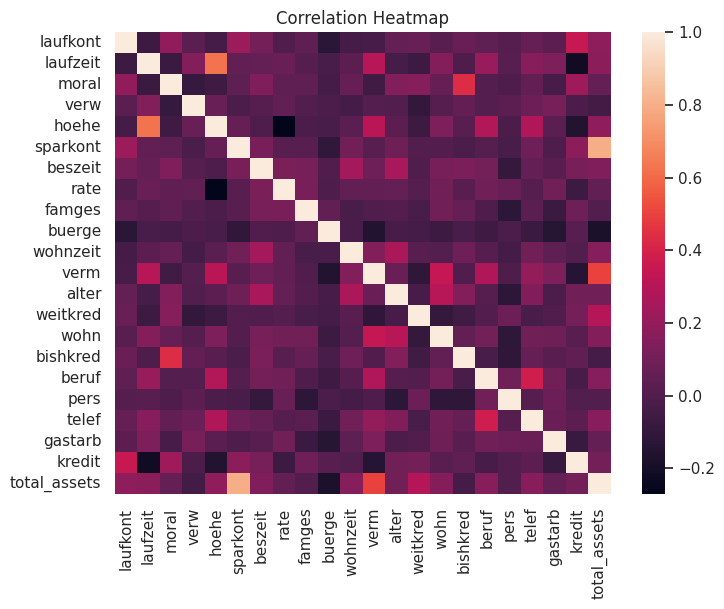

In [175]:
data_corr_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(data=data_corr_matrix)
plt.title("Correlation Heatmap")
plt.show()

**Scaling features**

In [110]:
scaler = StandardScaler().fit(X=data)
X_scaled = scaler.transform(X=data)

**TSNE. Make 2-component dataset for 2d visualization**

In [111]:
full_data = TSNE().fit_transform(X_scaled)

**Unique values counter**

In [112]:
def count_uniques(array):
    unique_values, value_counts = np.unique(ar=array, return_counts=True)

    for value, count in zip(unique_values, value_counts):
        print(f"Values {value}: {count}")

**Clustering metrics**

In [113]:
def metrics(X, labels):
    silhouette = silhouette_score(X=X, labels=labels)
    ch_index = calinski_harabasz_score(X=X, labels=labels)
    davies_bouldin = davies_bouldin_score(X=X, labels=labels)
    print(f"Silhouette Score (MAX is BETTER):        {silhouette}")
    print(f"Calinski-Harabasz Index (MAX is BETTER): {ch_index}")
    print(f"Davies-Bouldin Index (MIN is BETTER):    {davies_bouldin}", end="\n\n")

    return silhouette, ch_index, davies_bouldin

**Plot function**

In [185]:
def plot_clusterization(labels, X=full_data):
    plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="summer", marker="o")
    plt.title("Clustering")
    plt.show()

## Clustering full data

### Kmeans

**Find optimal number of clusters for kmeans**

In [115]:
def kmeans_clusters(X):
    silhouette_scores = []
    ch_scores = []
    davies_bouldin_scores = []
    for n_clusters in range(2, 6):
        print(f"n_clusters={n_clusters}:")
        kmeans = KMeans(n_clusters=n_clusters, n_init=10).fit(X=X)
        labels = kmeans.predict(X=X)
        silhouette, ch_index, davies_bouldin = metrics(X=X, labels=labels)
        silhouette_scores.append(silhouette)
        ch_scores.append(ch_index)
        davies_bouldin_scores.append(davies_bouldin)

    silhouette_clusters = np.argmax(silhouette_scores) + 2
    ch_clusters = np.argmax(ch_scores) + 2
    bouldin_clusters = np.argmin(davies_bouldin_scores) + 2
    print("Optimal number of clusters")
    print(f"Silhouette clusters:     {silhouette_clusters}")
    print(f"Calinski-Harabasz Index: {ch_clusters}")
    print(f"Davies-Bouldin Index:    {bouldin_clusters}")


kmeans_clusters(X_scaled)

n_clusters=2:
Silhouette Score (MAX is BETTER):        0.08658259231053163
Calinski-Harabasz Index (MAX is BETTER): 95.49757090031525
Davies-Bouldin Index (MIN is BETTER):    3.146574330980559

n_clusters=3:
Silhouette Score (MAX is BETTER):        0.07875754526060288
Calinski-Harabasz Index (MAX is BETTER): 79.26875738325202
Davies-Bouldin Index (MIN is BETTER):    2.828745394555643

n_clusters=4:
Silhouette Score (MAX is BETTER):        0.07451767175463302
Calinski-Harabasz Index (MAX is BETTER): 70.972025253506
Davies-Bouldin Index (MIN is BETTER):    2.6184101972780907

n_clusters=5:
Silhouette Score (MAX is BETTER):        0.07436924462024588
Calinski-Harabasz Index (MAX is BETTER): 67.57278015052445
Davies-Bouldin Index (MIN is BETTER):    2.6708416052874684

Optimal number of clusters
Silhouette clusters:     2
Calinski-Harabasz Index: 2
Davies-Bouldin Index:    4


**Predict**

Values 0: 453
Values 1: 547
Silhouette Score (MAX is BETTER):        0.08664926339068112
Calinski-Harabasz Index (MAX is BETTER): 95.49704253232439
Davies-Bouldin Index (MIN is BETTER):    3.1450392203212827


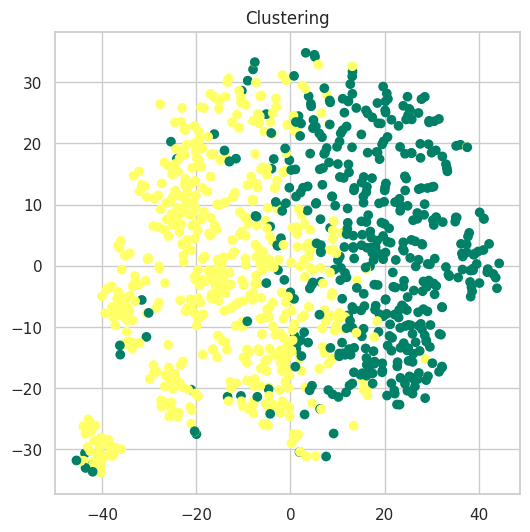

In [186]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42).fit(X=X_scaled)
kmeans_labels = kmeans.predict(X=X_scaled)

count_uniques(array=kmeans_labels)
metrics(X=X_scaled, labels=kmeans_labels)
plot_clusterization(labels=kmeans_labels)

### Agglomerative Clustering

**Find optimal clusters for agglomerative clustering**

In [117]:
def agglomerative_clusters(X):
    silhouette_scores = []
    ch_scores = []
    davies_bouldin_scores = []
    for n_clusters in range(2, 6):
        print(f"n_clusters={n_clusters}:")
        labels = AgglomerativeClustering(
            n_clusters=n_clusters,
            distance_threshold=None,
            compute_full_tree=True,
        ).fit_predict(X=X)
        silhouette, ch_index, davies_bouldin = metrics(X=X, labels=labels)
        silhouette_scores.append(silhouette)
        ch_scores.append(ch_index)
        davies_bouldin_scores.append(davies_bouldin)

    silhouette_clusters = np.argmax(silhouette_scores) + 2
    ch_clusters = np.argmax(ch_scores) + 2
    bouldin_clusters = np.argmin(davies_bouldin_scores) + 2
    print("Optimal number of clusters")
    print(f"Silhouette clusters:     {silhouette_clusters}")
    print(f"Calinski-Harabasz Index: {ch_clusters}")
    print(f"Davies-Bouldin Index:    {bouldin_clusters}")


agglomerative_clusters(X_scaled)

n_clusters=2:
Silhouette Score (MAX is BETTER):        0.07175459039535301
Calinski-Harabasz Index (MAX is BETTER): 62.550286683428006
Davies-Bouldin Index (MIN is BETTER):    3.586126616738917

n_clusters=3:
Silhouette Score (MAX is BETTER):        0.0852402609070965
Calinski-Harabasz Index (MAX is BETTER): 59.935592704847195
Davies-Bouldin Index (MIN is BETTER):    2.8921319741372415

n_clusters=4:
Silhouette Score (MAX is BETTER):        0.06684963048054617
Calinski-Harabasz Index (MAX is BETTER): 55.82509251465061
Davies-Bouldin Index (MIN is BETTER):    2.5451763029295686

n_clusters=5:
Silhouette Score (MAX is BETTER):        0.07148100321436268
Calinski-Harabasz Index (MAX is BETTER): 53.02865526979069
Davies-Bouldin Index (MIN is BETTER):    2.444069091997781

Optimal number of clusters
Silhouette clusters:     3
Calinski-Harabasz Index: 2
Davies-Bouldin Index:    5


**Find optimal distance for agglomerative clustering**

In [118]:
def agglomerative_cluster_distance(X, search_range):
    for index in search_range:
        print(f"distance: {index}:")
        agg_dist_cluster = AgglomerativeClustering(
            n_clusters=None, distance_threshold=index
        ).fit(X=X)

        labels: np.ndarray = agg_dist_cluster.fit_predict(X=X)
        print(f"Clusters number: {len(np.unique(labels[labels != -1]))}")

        metrics(X=X, labels=labels)


agglomerative_cluster_distance(X=X_scaled, search_range=np.arange(36, 48, 2))

distance: 36:
Clusters number: 5
Silhouette Score (MAX is BETTER):        0.07148100321436268
Calinski-Harabasz Index (MAX is BETTER): 53.02865526979069
Davies-Bouldin Index (MIN is BETTER):    2.444069091997781

distance: 38:
Clusters number: 4
Silhouette Score (MAX is BETTER):        0.06684963048054617
Calinski-Harabasz Index (MAX is BETTER): 55.82509251465061
Davies-Bouldin Index (MIN is BETTER):    2.5451763029295686

distance: 40:
Clusters number: 4
Silhouette Score (MAX is BETTER):        0.06684963048054617
Calinski-Harabasz Index (MAX is BETTER): 55.82509251465061
Davies-Bouldin Index (MIN is BETTER):    2.5451763029295686

distance: 42:
Clusters number: 3
Silhouette Score (MAX is BETTER):        0.0852402609070965
Calinski-Harabasz Index (MAX is BETTER): 59.935592704847195
Davies-Bouldin Index (MIN is BETTER):    2.8921319741372415

distance: 44:
Clusters number: 3
Silhouette Score (MAX is BETTER):        0.0852402609070965
Calinski-Harabasz Index (MAX is BETTER): 59.93559270

**Predict**

Values 0: 299
Values 1: 665
Values 2: 36


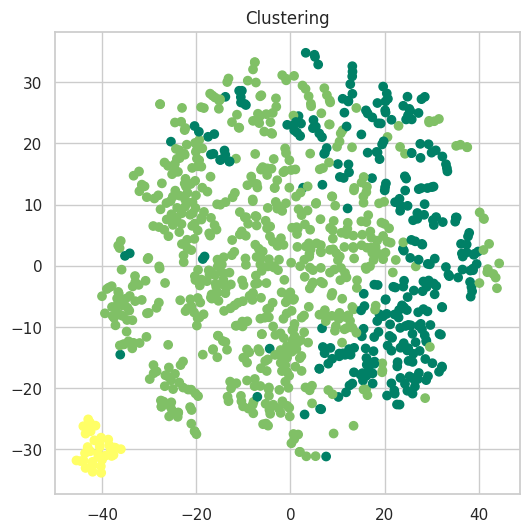

In [187]:
agg_cluster = AgglomerativeClustering(
    n_clusters=None,
    distance_threshold=46,
    compute_full_tree=True,
).fit_predict(X=X_scaled)

count_uniques(array=agg_cluster)
plot_clusterization(labels=agg_cluster)

### Birch

**Predict**

Values 0: 390
Values 1: 574
Values 2: 36
Silhouette Score (MAX is BETTER):        0.07384574485984882
Calinski-Harabasz Index (MAX is BETTER): 55.183767466686234
Davies-Bouldin Index (MIN is BETTER):    3.2410820308995825


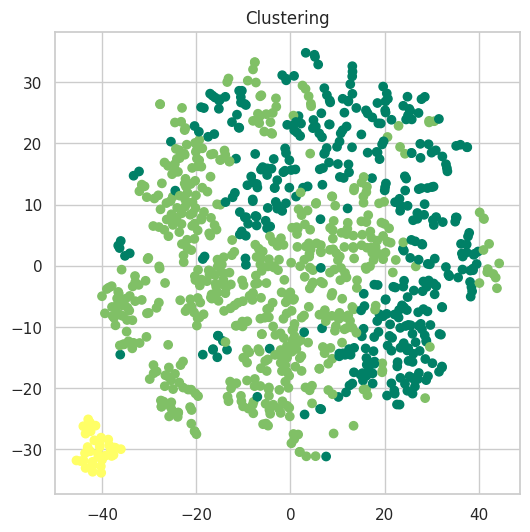

In [188]:
birch = Birch().fit(X=X_scaled)
birch_labels: np.ndarray = birch.predict(X=X_scaled)

count_uniques(array=birch_labels)
metrics(X=X_scaled, labels=birch_labels)
plot_clusterization(labels=birch_labels)

## Dimensionality reduction

**Applying PCA for dimensionality reduction**

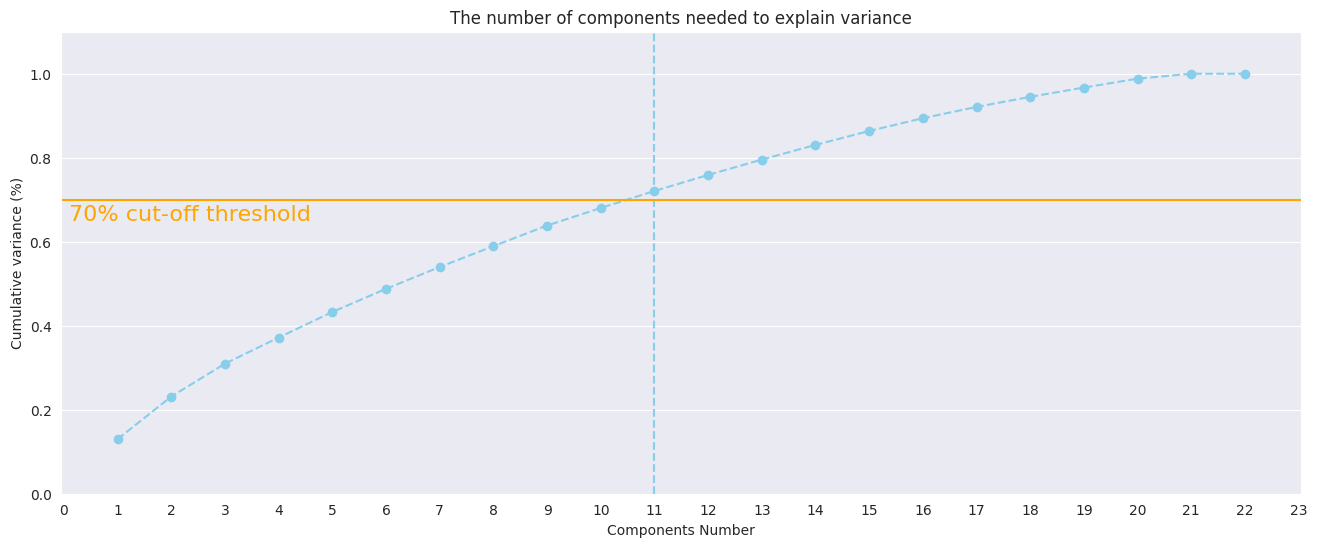

In [166]:
pca = PCA().fit(X=X_scaled)

plt.rcParams["figure.figsize"] = (16, 6)

fig, ax = plt.subplots()
xi = np.arange(start=1, stop=23, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(bottom=0.0, top=1.1)
plt.plot(xi, y, marker="o", linestyle="--", color="skyblue")

plt.xlabel(xlabel="Components Number")
plt.xticks(ticks=np.arange(0, 24, step=1))
plt.ylabel(ylabel="Cumulative variance (%)")
plt.title("The number of components needed to explain variance")

# Add a vertical line at the point where cumulative variance reaches 70%
explained_variance_threshold = 0.7
num_components_at_threshold = np.argmax(y >= explained_variance_threshold) + 1
plt.axvline(x=num_components_at_threshold, color="skyblue", linestyle="--")

plt.axhline(y=0.7, color="orange", linestyle="-")
plt.text(x=0.1, y=0.65, s="70% cut-off threshold", color="orange", fontsize=16)

ax.grid(axis="x")
plt.show()

**Reduce dataset's dimensionality to 11 components (70%)**

In [122]:
X_70p = TSNE(n_components=11, method="exact", random_state=42).fit_transform(X_scaled)

**Make 2-component dataset for 2d visualization**

In [123]:
X_70p_vis = TSNE(n_components=2, random_state=42).fit_transform(X_70p)

## Clustering data with reduced dimensionality

### Kmeans

Values 0: 465
Values 1: 535
Silhouette Score (MAX is BETTER):        0.19221848249435425
Calinski-Harabasz Index (MAX is BETTER): 294.4976188350032
Davies-Bouldin Index (MIN is BETTER):    1.8134522593564413


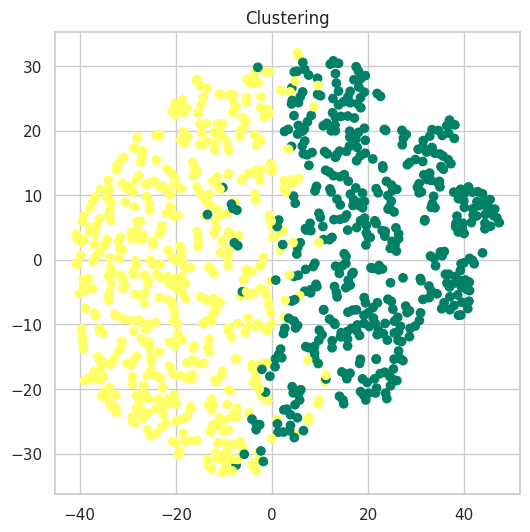

In [189]:
kmeans_70p = KMeans(n_clusters=2, n_init=10, random_state=42).fit(X=X_70p)
kmeans_labels_70p: np.ndarray = kmeans_70p.predict(X=X_70p)

count_uniques(array=kmeans_labels_70p)
metrics(X=X_70p, labels=kmeans_labels_70p)
plot_clusterization(labels=kmeans_labels_70p, X=X_70p_vis)

### Agglomerative Clusters

**Find optimal number of clusters for agglomerative clusters**

In [136]:
agglomerative_clusters(X=X_70p)

n_clusters=2:
Silhouette Score (MAX is BETTER):        0.15117137134075165
Calinski-Harabasz Index (MAX is BETTER): 204.18082714946019
Davies-Bouldin Index (MIN is BETTER):    1.9493807288811182

n_clusters=3:
Silhouette Score (MAX is BETTER):        0.08954662829637527
Calinski-Harabasz Index (MAX is BETTER): 156.82672990364475
Davies-Bouldin Index (MIN is BETTER):    2.5153536373832996

n_clusters=4:
Silhouette Score (MAX is BETTER):        0.08594577014446259
Calinski-Harabasz Index (MAX is BETTER): 140.0607901954393
Davies-Bouldin Index (MIN is BETTER):    2.2659450193190933

n_clusters=5:
Silhouette Score (MAX is BETTER):        0.06503496319055557
Calinski-Harabasz Index (MAX is BETTER): 117.54301971976597
Davies-Bouldin Index (MIN is BETTER):    2.5008412348377798

Optimal number of clusters
Silhouette clusters:     2
Calinski-Harabasz Index: 2
Davies-Bouldin Index:    2


**Find optimal distance for agglomerative clusters**

In [138]:
agglomerative_cluster_distance(X=X_70p, search_range=np.arange(80, 100, 4))

distance: 80:
Clusters number: 4
Silhouette Score (MAX is BETTER):        0.08594577014446259
Calinski-Harabasz Index (MAX is BETTER): 140.0607901954393
Davies-Bouldin Index (MIN is BETTER):    2.2659450193190933

distance: 84:
Clusters number: 4
Silhouette Score (MAX is BETTER):        0.08594577014446259
Calinski-Harabasz Index (MAX is BETTER): 140.0607901954393
Davies-Bouldin Index (MIN is BETTER):    2.2659450193190933

distance: 88:
Clusters number: 4
Silhouette Score (MAX is BETTER):        0.08594577014446259
Calinski-Harabasz Index (MAX is BETTER): 140.0607901954393
Davies-Bouldin Index (MIN is BETTER):    2.2659450193190933

distance: 92:
Clusters number: 4
Silhouette Score (MAX is BETTER):        0.08594577014446259
Calinski-Harabasz Index (MAX is BETTER): 140.0607901954393
Davies-Bouldin Index (MIN is BETTER):    2.2659450193190933

distance: 96:
Clusters number: 4
Silhouette Score (MAX is BETTER):        0.08594577014446259
Calinski-Harabasz Index (MAX is BETTER): 140.06079

**Predict using n_clusters**

Values 0: 705
Values 1: 295


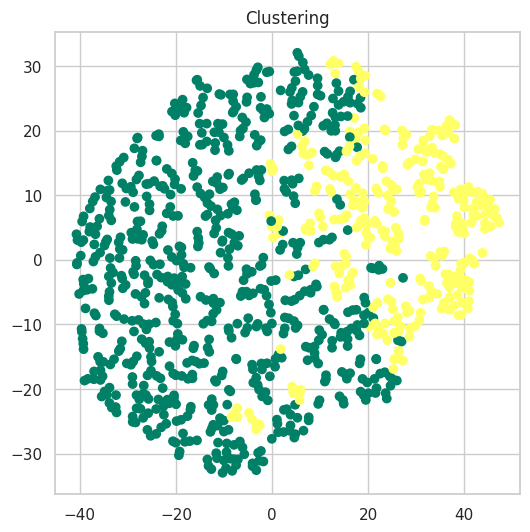

In [190]:
agg_dist_clusterizato_70p = AgglomerativeClustering(
    n_clusters=2, distance_threshold=None
).fit(X=X_70p)
agg_dist_labels_70p: np.ndarray = agg_dist_clusterizato_70p.fit_predict(X=X_70p)

count_uniques(array=agg_dist_labels_70p)
plot_clusterization(labels=agg_dist_labels_70p, X=X_70p_vis)

### Birch

Values 0: 705
Values 1: 295
Silhouette Score (MAX is BETTER):        0.15117137134075165
Calinski-Harabasz Index (MAX is BETTER): 204.18082714946019
Davies-Bouldin Index (MIN is BETTER):    1.9493807288811182


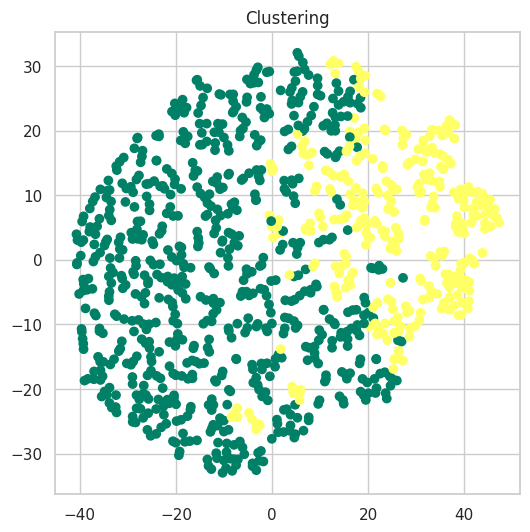

In [191]:
birch_70p = Birch(
    threshold=0.5,
    branching_factor=50,
    n_clusters=2,
).fit(X=X_70p)
birch_labels_70p: np.ndarray = birch_70p.predict(X=X_70p)

count_uniques(array=birch_labels_70p)
metrics(X=X_70p, labels=birch_labels_70p)
plot_clusterization(labels=birch_labels_70p, X=X_70p_vis)